In [355]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [356]:
#load the dataset
df = pd.read_csv("glass.csv")

In [357]:
#shape of Data
df.shape

(214, 10)

In [358]:
#print the first five rows of data
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [359]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [360]:
#check for null values
df.notnull().all()

RI      True
Na      True
Mg      True
Al      True
Si      True
K       True
Ca      True
Ba      True
Fe      True
Type    True
dtype: bool

In [361]:
#description of data
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


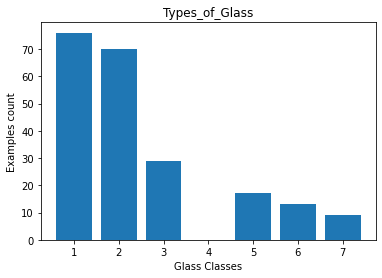

In [362]:
# data visualization
glass_classes = df['Type'].unique()
values = df['Type'].value_counts()

plt.bar(glass_classes, values)
plt.title('Types_of_Glass')
plt.xlabel('Glass Classes')
plt.ylabel('Examples count')
plt.show()

In [363]:
#column names
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [364]:
# Types Means (What do 1,2,3,5,6,7 Types mean?)

glassTypesList = ['1 -> building_windows_float_processed',
                  '2 -> building_windows_non_float_processed',
                  '3 -> vehicle_windows_float_processed',
                  '4 -> vehicle_windows_non_floatprocessed (none in this database)',
                  '5 -> containers',
                  '6 -> tableware', 
                  '7 -> headlamps']
print('\033[32m'+'\033[4m'+'Target Column Description(Type of glass - class attribute)\n'+'\033[0m')
for i in range(0,len(df['Type'].unique())+1):
    print('\033[31m'+glassTypesList[i])

Target Column Description(Type of glass - class attribute)

1 -> building_windows_float_processed
2 -> building_windows_non_float_processed
3 -> vehicle_windows_float_processed
4 -> vehicle_windows_non_floatprocessed (none in this database)
5 -> containers
6 -> tableware
7 -> headlamps


In [365]:
# Features Means (What do 'RI,Na,Mg,Al,Si,K,Ca,Ba,Fe' mean?)

print('\033[01m'+'\033[32m'+'\033[4m'+'Feature Columns Description\n'+'\033[0m')

featuresList = ['RI -> refractive index',
                'Na -> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)',
                'Mg -> Magnesium',
                'Al -> Aluminum',
                'Si -> Silicon',
                'K  -> Potassium', 
                'Ca -> Barium',
                'Fe -> Iron']

for i in range(0,len(df.columns.unique())-2):
    print('\033[31m'+featuresList[i])

Feature Columns Description

RI -> refractive index
Na -> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg -> Magnesium
Al -> Aluminum
Si -> Silicon
K  -> Potassium
Ca -> Barium
Fe -> Iron


In [366]:
# X and Y assignment

X = df.iloc[:,:-1]
Y = df.iloc[:,9]

In [367]:
accuracies = {}

In [368]:
#Splitting data into train and test values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [369]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [370]:
#Classification( Random Forest)
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [371]:
#accuracy of random forest
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracies['Random Forest Classification'] = accuracy

print(accuracy)


0.8372093023255814


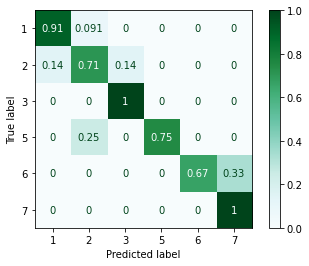

In [372]:
#Plotting Confusion Matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()


In [373]:
#Classification (Decision Tree)
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

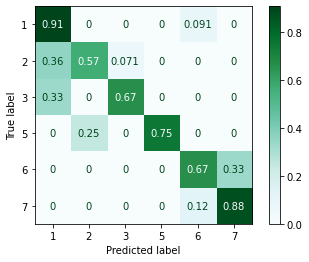

In [374]:
#Plotting Confusion Matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()

In [375]:
#accuracy of Decision Tree
accuracy = accuracy_score(y_test, y_pred)
accuracies['Decision Tree Classification'] = accuracy

print(accuracy)

0.7441860465116279


In [376]:
#Classification (KNN)
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# metric = 'minkowski', p = 2 means Euclidean distance.
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [377]:
#accuracy of KNN
accuracy = accuracy_score(y_test, y_pred)
accuracies['K-NN'] = accuracy

print(accuracy)

0.6976744186046512


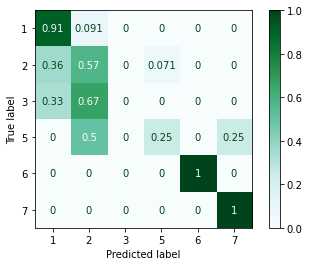

In [378]:
#Plotting the Confusion Matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()

In [379]:
#Classification(Naive Bayes)
#Naive Nayes Classifier
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [380]:
#accuracy of Naive Bayes
accuracy = accuracy_score(y_test, y_pred)
accuracies['Naive Bayes'] = accuracy

print(accuracy)

0.5581395348837209


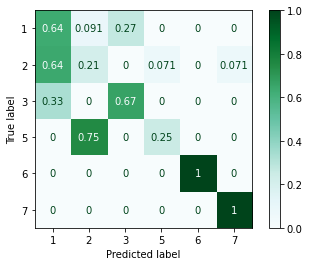

In [381]:
plot_confusion_matrix(classifier, x_test, y_test, cmap = plt.cm.BuGn, normalize = 'true')
plt.show()


In [382]:
#Classification(Logistic Regression)
#Logistic regression Classifier
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [383]:
#accuracy of logistic regression
accuracy = accuracy_score(y_test, y_pred)
accuracies['Logistic Regression'] = accuracy

print(accuracy)

0.7209302325581395


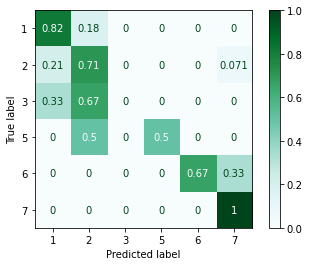

In [384]:
#Plotiing Confusion Matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap = plt.cm.BuGn, normalize= 'true')
plt.show()

In [385]:
#Comparing the accuracies
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

,Model Name,Accuracy Score
0,Random Forest Classification,0.837209
1,Decision Tree Classification,0.744186
2,K-NN,0.697674
3,Naive Bayes,0.558140
4,Logistic Regression,0.720930


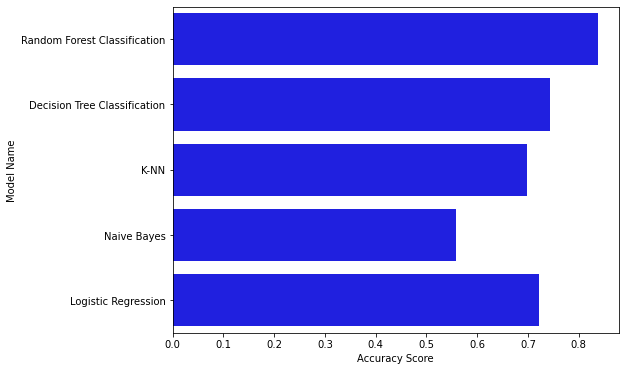

In [386]:
#plotting the accuracies in graph
f, ax = plt.subplots(figsize = (8,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'Model Name', x = 'Accuracy Score', data = accuracy_df, color = 'Blue')
plt.show()
